In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Read data

In [2]:
df_train = df_Tr = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = df_Te= pd.read_csv("/kaggle/input/titanic/test.csv")


# Explore data

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#import seaborn as sns
#ax=sns.pairplot(df_train)#, hue= "cut")
#ax

In [7]:
columns=df_train.columns
for i in columns :
    print(f'{i} have {df_train[i].nunique()} ')

PassengerId have 891 
Survived have 2 
Pclass have 3 
Name have 891 
Sex have 2 
Age have 88 
SibSp have 7 
Parch have 7 
Ticket have 681 
Fare have 248 
Cabin have 147 
Embarked have 3 


In [8]:
df_train["Cabin"].unique()
# A , B , C , D , E , F , G  , T

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [9]:
#import matplotlib.pyplot as plt
#import seaborn as sns

#fig= plt.figure(figsize=(70,10))

#Cabin_Letter_survival_rate = df_train.groupby('Cabin')['Survived'].mean().reset_index()
#ax= sns.barplot(x='Cabin', y='Survived', data=Cabin_Letter_survival_rate,  alpha= 0.9, width= 0.6)
#for p in ax.patches:
#    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
#                ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),textcoords='offset points')

In [10]:
#import matplotlib.pyplot as plt
#import seaborn as sns

#fig= plt.figure(figsize=(50,7))

#Cabin_Letter_survival_rate = df_train.groupby('Age')['Survived'].mean().reset_index()
#ax= sns.barplot(x='Age', y='Survived', data=Cabin_Letter_survival_rate,  alpha= 0.9, width= 0.6)
#for p in ax.patches:
#    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
#                ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),textcoords='offset points')
   #     16<=x<36 36<x<48     x>=48
#c2 =[7-->11 ,14<15 ,16-->28 34-->47,51,54,55.5,57,59,61,64-->74]
#c1 =[1-->6 ,12-->13 ,29-->34,15,48-->50,53]
# 0 .25 .5 .75 1



In [11]:
#Cabin_Letter_survival_rate

In [12]:
np.sort(df_train["Ticket"].unique())


array(['110152', '110413', '110465', '110564', '110813', '111240',
       '111320', '111361', '111369', '111426', '111427', '111428',
       '112050', '112052', '112053', '112058', '112059', '112277',
       '112379', '113028', '113043', '113050', '113051', '113055',
       '113056', '113059', '113501', '113503', '113505', '113509',
       '113510', '113514', '113572', '113760', '113767', '113773',
       '113776', '113781', '113783', '113784', '113786', '113787',
       '113788', '113789', '113792', '113794', '113796', '113798',
       '113800', '113803', '113804', '113806', '113807', '11668', '11751',
       '11752', '11753', '11755', '11765', '11767', '11769', '11771',
       '11774', '11813', '11967', '12233', '12460', '12749', '13049',
       '13213', '13214', '13502', '13507', '13509', '13567', '13568',
       '14311', '14312', '14313', '14973', '1601', '16966', '16988',
       '17421', '17453', '17463', '17464', '17465', '17466', '17474',
       '17764', '19877', '19928', '19943

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Summary of explore

**Drop :**
* *PassengerId , Name* all of it are unique values

**Drop OR preprocessing With convert:**
* *Cabin* have alot of null values 
* *Ticket* big number of unique values

**Need to preprocessing :**
* *Age , Embarked*

**Need to convert:**
* *Sex, Embarked* --> Nominal
 

# Preprocessing

In [14]:
df_train.Cabin = df_train.Cabin.replace(np.nan,"null")
df_train.Cabin = df_train.Cabin.str[:1]
df_train.Cabin = df_train.Cabin.replace("n","null")

df_test.Cabin = df_test.Cabin.replace(np.nan,"null")
df_test.Cabin = df_test.Cabin.str[:1]
df_test.Cabin = df_test.Cabin.replace("n","null")

df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,null,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,null,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,null,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,null,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,null,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,null,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,null,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,null,S


In [15]:
df_train['have_Cabin']  = [1 if i != "null" and i !="T" else 0 for i in df_train.Cabin  ]
df_test['have_Cabin']  = [1 if i != "null" and i !="T" else 0 for i in df_test.Cabin  ]

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,have_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,null,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,null,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,null,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,null,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,null,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,1


In [16]:
#df_train.Cabin.replace(['null', 'T', 'A', 'G', 'C', 'F', 'B', 'E', 'D'],[0,1,2,3,4,5,6,7,8],inplace=True)
#df_test.Cabin.replace(['null', 'T', 'A', 'G', 'C', 'F', 'B', 'E', 'D'],[0,1,2,3,4,5,6,7,8],inplace=True)
#df_train

In [17]:
#df_test.drop(columns='Cabin',inplace=True)
#df_test.drop(columns='Cabin',inplace=True)

In [18]:
#[ i.split()[0] if len(i.split())==1  else i.split()[2] for i in df_train.Ticket  ]
#tikcet_number=[]
#for i in df_train.Ticket  :
#     l = i.split()
#     print(l)
#     if len(l)==1 :
#            if l[0] == "LINE" :
#                tikcet_number.append( 1 )
#            else:
#                
#                tikcet_number.append( int(l[0]) )
#     elif len(l) == 2 :
#        tikcet_number.append( int(l[1]))
#     else: tikcet_number.append(int(l[2]))
#tikcet_number
#tikcet_number.replace("LINE",'1',inplace=True)

#df_train['tikcet_number'] = tikcet_number

In [19]:
df_train["Age"].fillna(df_train.Age.mean(),inplace=True)
df_test["Age"].fillna(df_test.Age.mean(),inplace=True)

df_train['Embarked'].fillna('S',inplace=True)

#df_test

In [20]:
#l=[]
#for i in df_train.Age :
#    if 7<=i<=11 or 14<=i<15 or 16<=i<=28 or 34<=i<=47 or i in [47,51,54,55.5,57,59,61] or 64<=i<=74 :
#        l.append(0)
#    else:
#        l.append(1)
#df_train["age& surv"] = l

In [21]:
df_train['Title'] = df_train.Name.str.split(',').str[1].str.split('.').str[0].str.strip()
df_test['Title'] = df_test.Name.str.split(',').str[1].str.split('.').str[0].str.strip()

df_train.Title.unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [22]:
print(df_test.Title.value_counts())
print()
print(df_train.Title.value_counts())


Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64


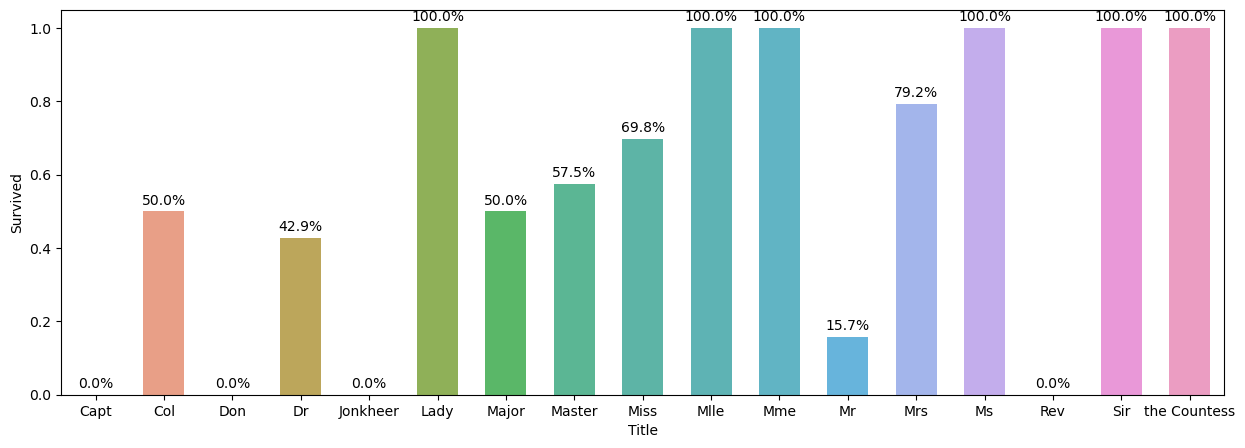

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.figure(figsize=(15,5))
Cabin_Letter_survival_rate = df_train.groupby('Title')['Survived'].mean().reset_index()

ax= sns.barplot(x='Title', y='Survived', data=Cabin_Letter_survival_rate,  alpha= 0.9, width= 0.6)
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),textcoords='offset points')

In [24]:
# 0    Capt , Don  , Jonkheer , Mr     , Rev
# 1    Col  , Dr   , Major    , Master 
# 2    Miss , Mrs
# 3    Lady , Mlle , Mme      , Ms   , Sir  , the Countess

new_title = []
for i in df_train.Title :
    if   i in ['Capt' , 'Don'  , 'Jonkheer' , 'Mr'     , 'Rev'] : new_title.append(0)
    elif i in ['Col'  , 'Dr'   , 'Major'    , 'Master'] : new_title.append(1)
    elif i in ['Miss',"Mrs"] : new_title.append(2)
    else: new_title.append(3)
df_train.Title = new_title

new_title = []
for i in df_test.Title :
    if   i in ['Capt' , 'Dona'  , 'Jonkheer' , 'Mr'     , 'Rev'] : new_title.append(0)
    elif i in ['Col'  , 'Dr'   , 'Major'    , 'Master'] : new_title.append(1)
    elif i in ['Miss',"Mrs"] : new_title.append(2)
    else: new_title.append(3) 
df_test.Title = new_title


In [25]:
df_train.drop(columns=["PassengerId","Name","Cabin","Ticket"],inplace=True)
ID=df_test.PassengerId
df_test.drop(columns=["PassengerId","Name","Cabin","Ticket"],inplace=True)

In [26]:
from sklearn.preprocessing import OneHotEncoder

Non_OrdinalAtt = ['Sex', 'Embarked' ]

#one hot encoding
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(df_train[Non_OrdinalAtt]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(df_test[Non_OrdinalAtt]))

# One-hot encoding removed index; put it back
OH_cols_train.index = df_train.index
OH_cols_test.index = df_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = df_train.drop(Non_OrdinalAtt, axis=1)
num_X_test = df_test.drop(Non_OrdinalAtt, axis=1)

# Add one-hot encoded columns to numerical features
df_train = pd.concat([num_X_train, OH_cols_train], axis=1)
df_test= pd.concat([num_X_test, OH_cols_test], axis=1)

#df_train.drop(columns=['1','3'],inplace=True)
#df_test.drop(columns=['1','3'],inplace=True)

#print([i for i in range(3,22)])
#df_train.drop(columns=[ 5, 6, 7, 8, 9, 10, 11, 12, 14, 15,18, 19, 20, 21],inplace=True )
#df_test.drop(columns=[ 5, 6, 7, 8, 9, 10, 11, 12, 14, 15,18, 19, 20, 21],inplace=True )

df_train.columns = df_train.columns.astype(str)
df_test.columns = df_test.columns.astype(str)

#13 16 17

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


we maybe convert the Dtype of **Fare & Age** from **float** to **int**

maybe will be better for the Model

In [27]:
df_test.Fare.fillna(df_test.Fare.mean(),inplace=True)


In [28]:
new_train=df_train.copy()
new_test = df_test.copy()
new_train.Fare = [int(round(i)) for i in  new_train.Fare ]
new_train.Age = [int(round(i)) for i in  new_train.Age ]

new_test.Fare = [int(round(i)) for i in  new_test.Fare ]
new_test.Age = [int(round(i)) for i in  new_test.Age ]

#new_train.Fare , new_train.Age = new_train.Fare.astype(int) , new_train.Age.astype(int)
new_train = new_train.astype(int)
new_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,have_Cabin,Title,0,1,2,3,4
0,0,3,22,1,0,7,0,0,0,1,0,0,1
1,1,1,38,1,0,71,1,2,1,0,1,0,0
2,1,3,26,0,0,8,0,2,1,0,0,0,1
3,1,1,35,1,0,53,1,2,1,0,0,0,1
4,0,3,35,0,0,8,0,0,0,1,0,0,1


<Axes: >

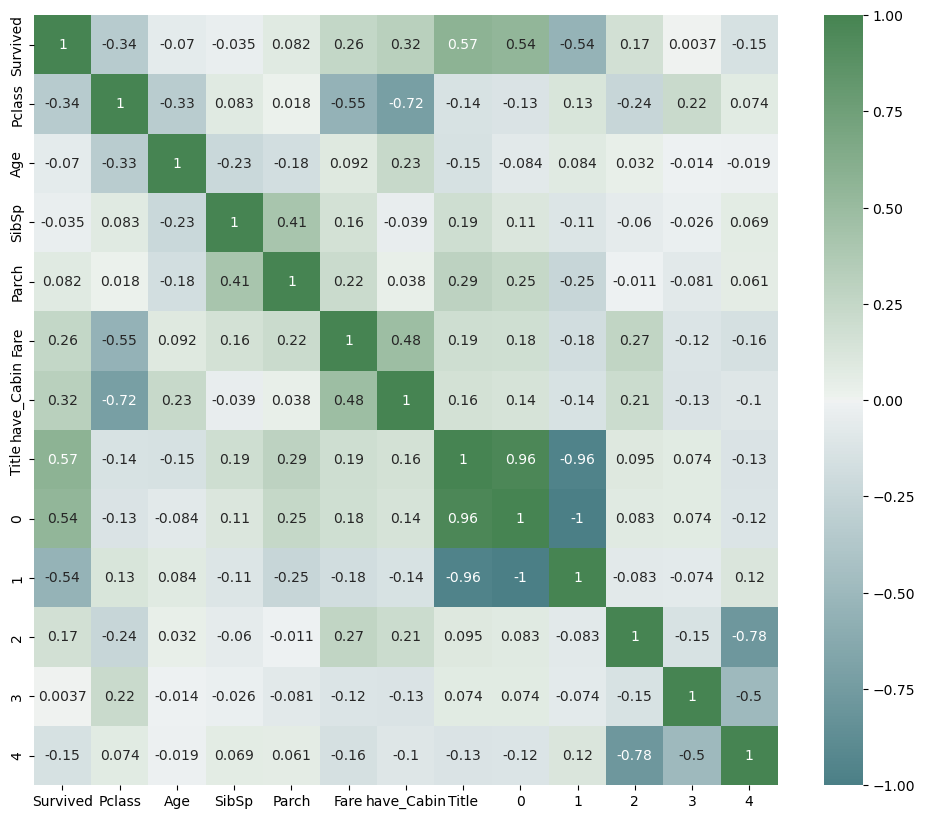

In [29]:
#correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

cmap = sns.diverging_palette(205, 133, 63,as_cmap=True)
corrmat= df_train.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [30]:
#df_train.drop(columns=['1','3'],inplace=True)
#df_test.drop(columns=['1','3'],inplace=True)

#df_train.drop(columns=['Age','SibSp','Parch'],inplace=True)
#df_test.drop(columns=['Age','SibSp','Parch'],inplace=True)

#df_train.drop(columns=['have_Cabin'],inplace=True)
#df_test.drop(columns=['have_Cabin'],inplace=True)

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   have_Cabin  891 non-null    int64  
 7   Title       891 non-null    int64  
 8   0           891 non-null    float64
 9   1           891 non-null    float64
 10  2           891 non-null    float64
 11  3           891 non-null    float64
 12  4           891 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 90.6 KB


# Modeling

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
# svm, knn, naive, RandomForest, Tree .

from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split , cross_val_score , StratifiedKFold

In [33]:
#build model
DT = DecisionTreeClassifier(max_depth=10)
RF = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=0)
NB = GaussianNB()
KNN = KNeighborsClassifier(7)
SVM = SVC()
XGB = XGBClassifier()
l=[DT,RF,NB,KNN,SVM,XGB]

#split data to train & test
X=df_train.drop(columns="Survived")
y=df_train.Survived
Tx,Vx,Ty,Vy = train_test_split(X,y,test_size=.2,random_state=46)

#fitting the model
for i in l :
    i.fit(Tx,Ty)

#predict & calculate Erorr
for i in l :
    Py= i.predict(Vx)
    print(f'the accurcy of {i} = {accuracy_score(Vy,Py)}')
    model =i

    # Choose a cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

    print("Accuracy scores:", scores)
    print("Mean accuracy:", scores.mean())
    print()

the accurcy of DecisionTreeClassifier(max_depth=10) = 0.8715083798882681
Accuracy scores: [0.83798883 0.79775281 0.76404494 0.83146067 0.78089888]
Mean accuracy: 0.8024292260372858

the accurcy of RandomForestClassifier(max_depth=8, random_state=0) = 0.8659217877094972
Accuracy scores: [0.8547486  0.84269663 0.8258427  0.84269663 0.82022472]
Mean accuracy: 0.8372418555018518

the accurcy of GaussianNB() = 0.7988826815642458
Accuracy scores: [0.79329609 0.7752809  0.76966292 0.78651685 0.80898876]
Mean accuracy: 0.7867491055175444

the accurcy of KNeighborsClassifier(n_neighbors=7) = 0.7206703910614525
Accuracy scores: [0.73743017 0.7752809  0.75842697 0.70786517 0.75280899]
Mean accuracy: 0.7463624380139351

the accurcy of SVC() = 0.6480446927374302
Accuracy scores: [0.69832402 0.68539326 0.66853933 0.69101124 0.66853933]
Mean accuracy: 0.6823614336827569

the accurcy of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=

In [34]:
DT = DecisionTreeClassifier()
RF = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=0)
NB = GaussianNB()
KNN = KNeighborsClassifier(7)
SVM = SVC()
XGB = XGBClassifier()
l=[DT,RF,NB,KNN,SVM,XGB]

#split data to train & test
X=new_train.drop(columns="Survived")
y=new_train.Survived
Tx,Vx,Ty,Vy = train_test_split(X,y,test_size=.2,random_state=46)

#fitting the model
for i in l :
    i.fit(Tx,Ty)

#predict & calculate Erorr
for i in l :
    Py= i.predict(Vx)
    print(f'the accurcy of {i} = {accuracy_score(Vy,Py)}')
    
    model =i

    # Choose a cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

    print("Accuracy scores:", scores)
    print("Mean accuracy:", scores.mean())
    print()

the accurcy of DecisionTreeClassifier() = 0.8547486033519553
Accuracy scores: [0.82681564 0.78651685 0.7752809  0.79213483 0.76404494]
Mean accuracy: 0.7889586341095975

the accurcy of RandomForestClassifier(max_depth=8, random_state=0) = 0.8603351955307262
Accuracy scores: [0.84916201 0.84269663 0.81460674 0.83146067 0.8258427 ]
Mean accuracy: 0.8327537505492437

the accurcy of GaussianNB() = 0.7988826815642458
Accuracy scores: [0.79329609 0.7752809  0.76966292 0.78651685 0.80898876]
Mean accuracy: 0.7867491055175444

the accurcy of KNeighborsClassifier(n_neighbors=7) = 0.7206703910614525
Accuracy scores: [0.76536313 0.78651685 0.74157303 0.70786517 0.76404494]
Mean accuracy: 0.753072625698324

the accurcy of SVC() = 0.6424581005586593
Accuracy scores: [0.69832402 0.68539326 0.66853933 0.69101124 0.66853933]
Mean accuracy: 0.6823614336827569

the accurcy of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
       

In [35]:
RF = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=0)
X=df_train.drop(columns="Survived")
y=df_train.Survived
RF.fit(X,y)
Py = RF.predict(df_test)
output = pd.DataFrame({'PassengerId': ID, 'Survived': Py})
output.to_csv('submission.csv', index=False)